In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

In [3]:
right = pd.read_csv('40cm-try3-pilot_test/3-right_leg_tibi_20250429_191650_509.csv', skiprows=10, sep=",")
left = pd.read_csv('40cm-try3-pilot_test/2-left_leg_tibia_20250429_191650_507.csv', skiprows=10, sep=",")
pelvis = pd.read_csv('40cm-try3-pilot_test/1-pelvis(s2)_20250429_191650_500.csv', skiprows=10, sep=",")

In [4]:
time = right['SampleTimeFine']-right['SampleTimeFine'].iloc[0]
right['Tim-se']= time*1e-6
right['Tim_dt'] = right['Tim-se'].diff()
right['a_z'] = right['dv[3]'] / right['Tim_dt']

left['Tim-se'] = time * 1e-6
left['Tim_dt'] = left['Tim-se'].diff()
left['a_z'] = left['dv[3]'] / left['Tim_dt']

# For left dataframe

pelvis['Tim-se'] = time* 1e-6
pelvis['Tim_dt'] = pelvis['Tim-se'].diff()
pelvis['a_z'] = pelvis['dv[3]'] / pelvis['Tim_dt']

In [5]:
left['a_z'].describe()

count    448.000000
mean      -1.482754
std        7.373572
min      -80.098758
25%       -1.975925
50%       -0.785684
75%       -0.239395
max       62.398212
Name: a_z, dtype: float64

In [6]:
right['a_z'].describe()

count    448.000000
mean      -1.211865
std        8.036067
min     -112.474891
25%       -1.200546
50%       -0.081748
75%        0.190616
max       63.629987
Name: a_z, dtype: float64

In [7]:
pelvis['a_z'].describe()

count    448.000000
mean       2.829537
std        3.814346
min       -3.656387
25%        1.510440
50%        1.709666
75%        2.055274
max       31.666407
Name: a_z, dtype: float64

<Axes: title={'center': 'Pelvis Acc Z vs Time'}, xlabel='Tim-se'>

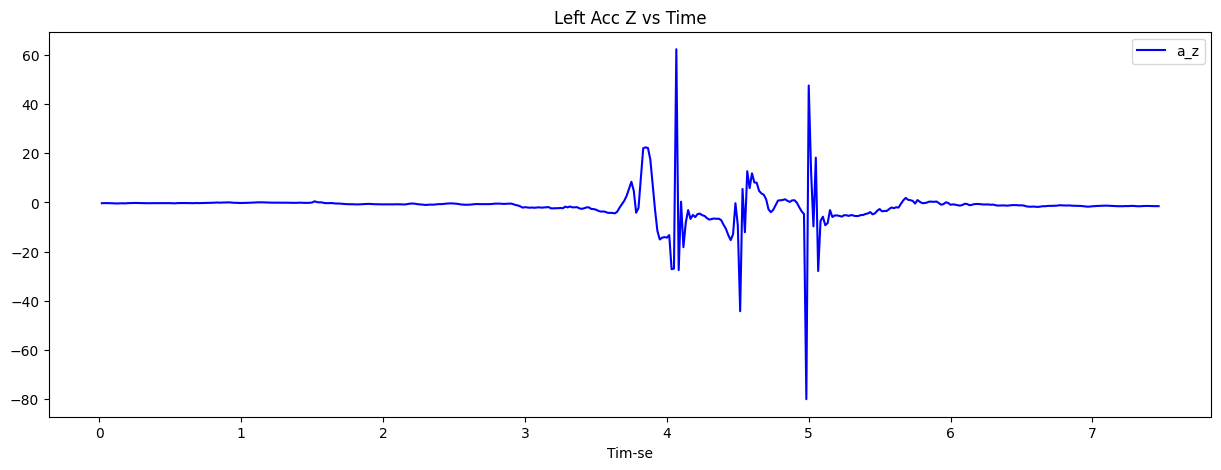

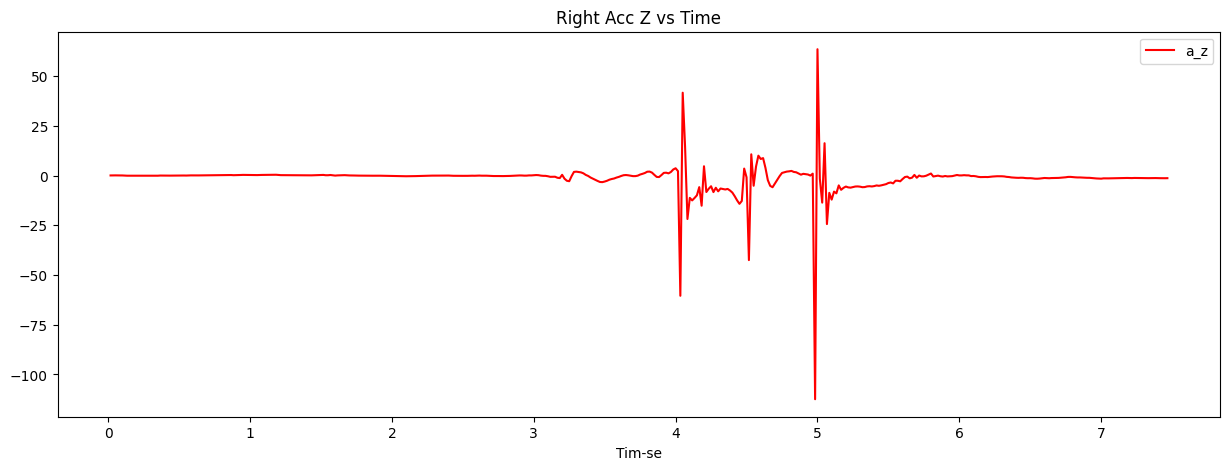

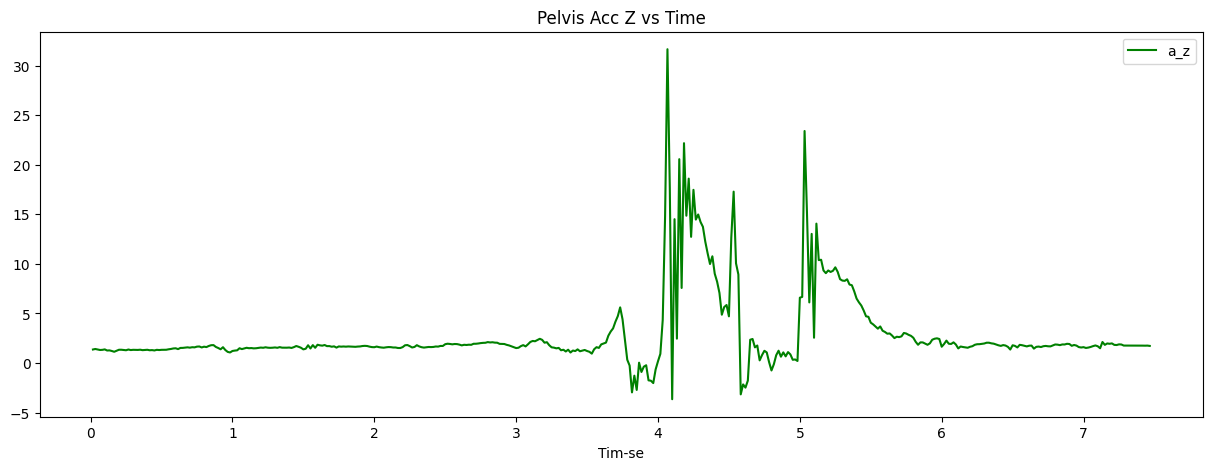

In [8]:
# Visualize the data and find the connection between the accelerometer and ties
left.plot(x='Tim-se', y='a_z', title='Left Acc Z vs Time', figsize=(15, 5), color='blue')
right.plot(x='Tim-se', y='a_z', title='Right Acc Z vs Time', figsize=(15, 5), color='red')
pelvis.plot(x='Tim-se', y='a_z', title='Pelvis Acc Z vs Time', figsize=(15, 5), color='green')